# rNet OceanDAO: increase DAO Health by adding dynamics to Grants system

## Research Topic/Question
- a. How can we make DAOs well functioning organisations?
    - i. Increasing DAO member (stakeholder) engagement
    - ii. Increase contributors by making Grants CAP predictable
    - iii. Balance Treasury 
- b. Can we derive assumptions of what might increase DAO's health?
    - i. Under what conditions will stakeholder participation grow?
    - ii. Under what conditions is ?

## Test agents

Stakeholders of DAOs are:
- Investors (Stakers)
- DAO Protocol initiators (Ambassadors)
- DAO Consumers
- DAO Producers
- DAO Intermediairies (Market Makers)
- Producer Aggregators (Unions)
- Proposal Applicants (Grantees)

## Policies and mechanisms (Ocean DAO)
- Investors
    - Stake on high performance datasets
    - Want to know what datasets are (going to be) valuable
    - Provide liquidity for an ROI
    - Unstake on poor performing datasets

- Ambassadors
    - Want to grow the ecosystem
    - Help newcomers onboard
    - Perform parameter adjustments for funding projects
    - Guide grantees in project proposals

- Consumers
    - Want good datasets for a fair price
    - Look for bargains
    - Want to be guided to curated datasets

- Producers
    - Want a fair price for their data
    - Will bargain for liquidity
    - Want to know what the market is looking for

- Market Makers
    - Want to promote datasets for market needs
    - Incentivise producers to provide by delivering needs
    - Incentivise consumers to buy by delivring curated lists of datasets

- Unions
    - Aggregate individual datasets in order to have more chance of being recognized as valuable
    - Make use of Market Makers curated lists

- Grantees ()
    - Want to earn rewards for growing the ecosystem
    - Want to know the best way for success using the rules of the DAO (Game theory)
   

### Assumptions



## Model File Structure


In [1]:
%pip install radcad
%pip install matplotlib
%pip install enforce_typing
%pip install names
%pip install networkx
%pip install scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [49]:
# tryouts
import numpy as np
import matplotlib.pyplot as plt
import random

def sigmoid(x):
    z = np.exp(-x)
    sig = 1 / (1 + z)
    return sig

sigmoid(10/3)


0.9655548043337889

## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

In [2]:
from model.state_variables_model1 import genesis_state
from model.partial_state_update_block_model1 import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params_model1 import params

running file: sim_setup.py
SIMULATION_TIME_STEPS:  451
MONTE_CARLO_RUNS:  4
end of file: sim_setup.py


In [3]:
model = Model(initial_state=genesis_state, state_update_blocks=partial_state_update_block, params=params)

simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)

simulations = [simulation]
experiment = Experiment(simulations)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
df


,dao_members,voters,stakers,builders,market_makers,grant_cap,treasury,projects,dataset_projects,unsound_projects,...,recurring_projects,existing_projects,experienced_projects,veteran_projects,round,simulation,subset,run,substep,timestep
0,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,0,0,1,0,0
1,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,0,0,1,4,1
2,200,50,50,50,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,0,0,1,4,2
3,197,50,52,45,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,0,0,1,4,3
4,197,50,52,45,50,200,500,20,5,0,...,0,0,"{'level 1': 0, 'level 2': 0, 'level 3': 0}",0,1,0,0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,2146,203,1909,10,24,145,500,17,7,4,...,11,-1,"{'level 1': 2, 'level 2': 2, 'level 3': 0}",0,15,0,2,4,4,447
5420,2146,203,1909,10,24,145,500,17,7,5,...,11,-1,"{'level 1': 2, 'level 2': 2, 'level 3': 0}",0,15,0,2,4,4,448
5421,2146,203,1909,10,24,145,500,17,6,6,...,11,-1,"{'level 1': 2, 'level 2': 2, 'level 3': 0}",0,15,0,2,4,4,449
5422,2166,203,1909,10,24,160,500,18,11,0,...,10,-1,"{'level 1': 2, 'level 2': 1, 'level 3': 0}",1,16,0,2,4,4,450


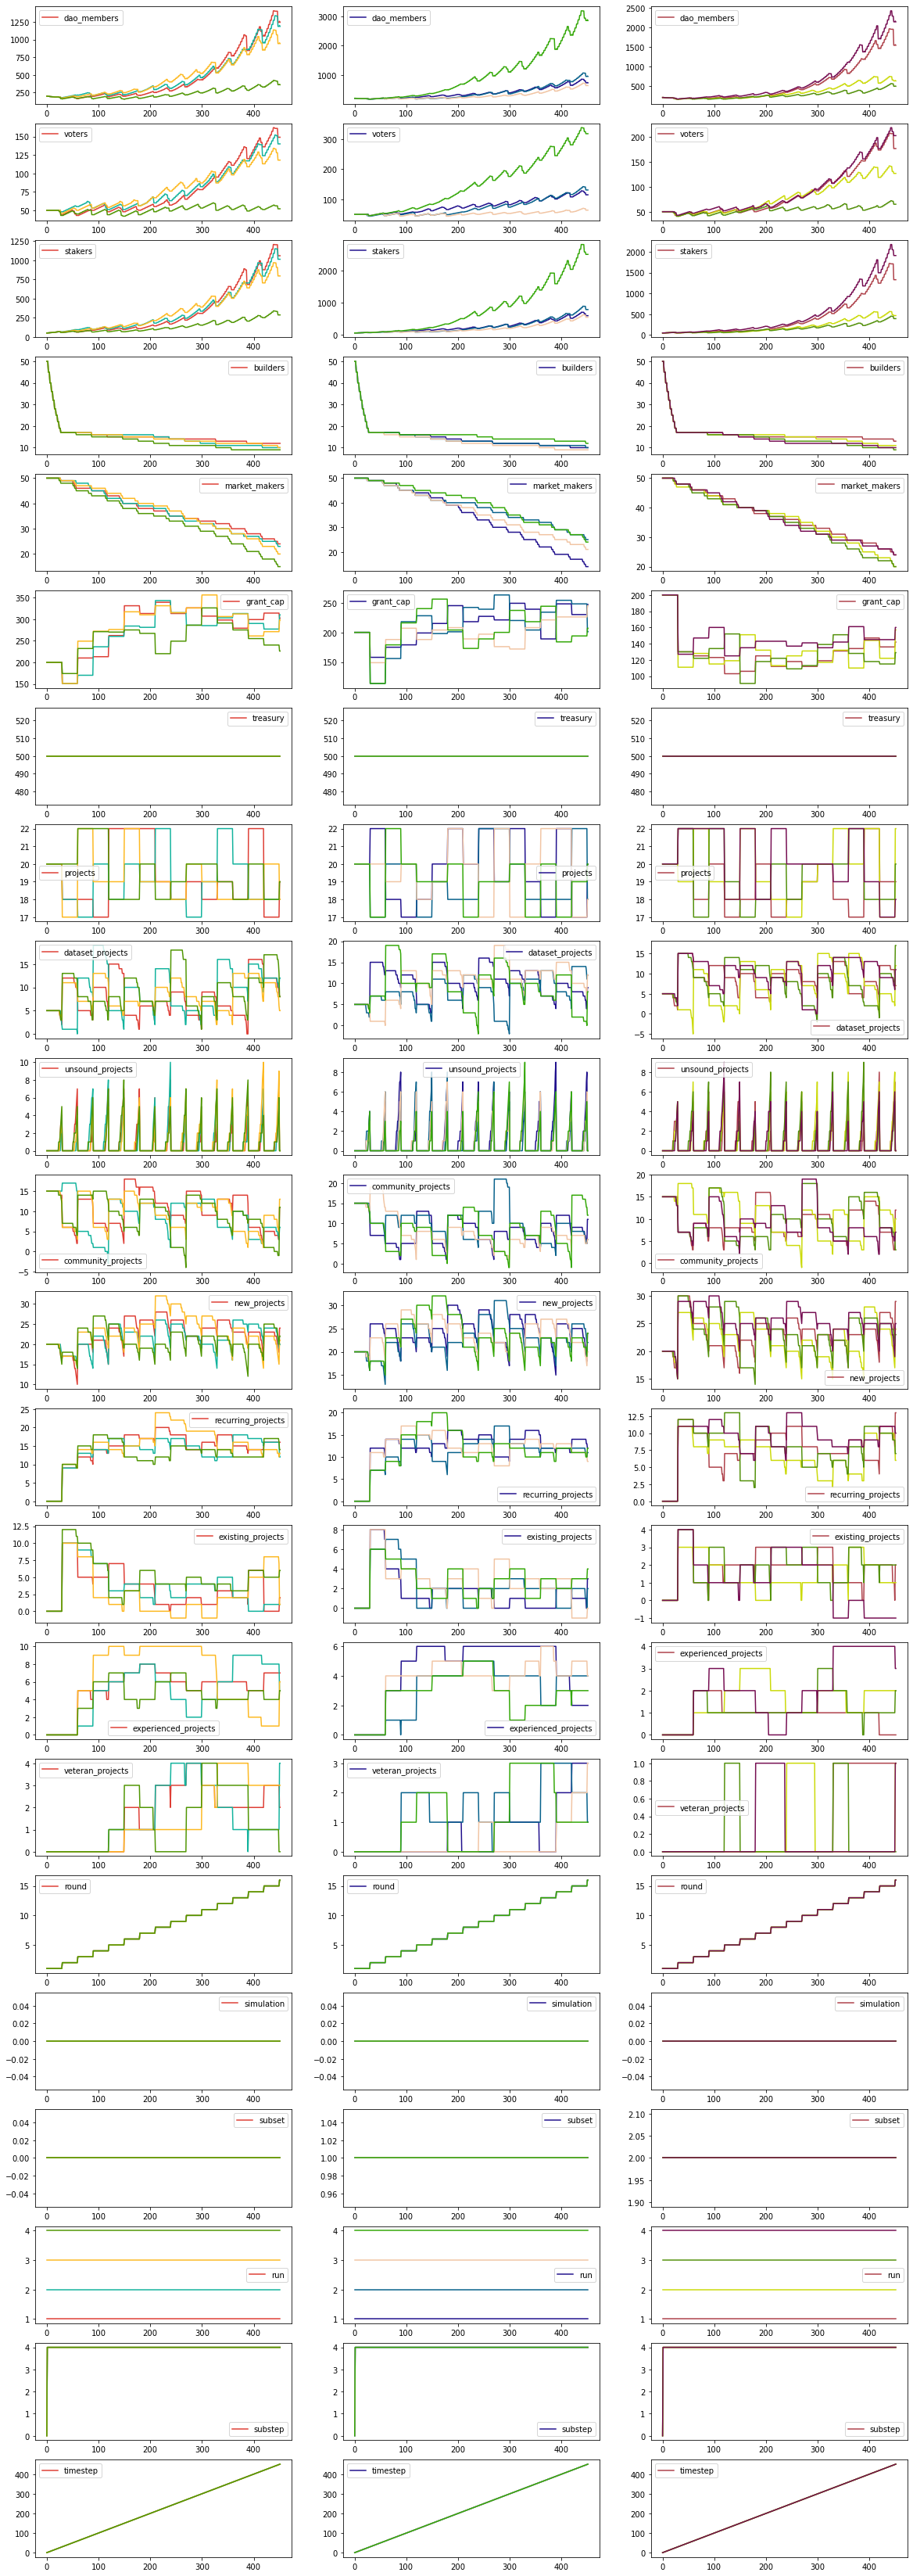

In [8]:
from model.plot_utils import monte_carlo_plot

dfplot = df.copy()

def reduce_experienced(exp: dict):
    return sum([exp['level 1'], exp['level 2'],exp['level 3'] ])

dfplot["experienced_projects"] = dfplot["experienced_projects"].apply(reduce_experienced)

dfs = [[pd.DataFrame for x in range(3)] for y in range(MONTE_CARLO_RUNS)]
for i in range(MONTE_CARLO_RUNS):
  for j in range(3):
    dfs[i][j] = dfplot[(dfplot['run'] == i+1) & (dfplot['subset'] == j)]
    dfs[i][j].reset_index(drop=True, inplace=True)
fig, axes = plt.subplots(nrows=22,ncols=3,figsize=(20,60))
for j in range(3):
    flag = True
    for i in range(MONTE_CARLO_RUNS):
      if i > 0: flag = False
      dfs[i][j].plot.line(ax = axes[:,j], subplots=True, legend=flag, color=[np.random.rand(3,)])

# # dfs[1]
# for column in list(dfplot.columns):
#   monte_carlo_plot(dfs, column)